### Modelos de aprendizaje automático
Los modelos de aprendizaje automático son especiales, ya que en lugar de editarlos las personas para que sean eficaces, son los datos los que les dan forma, es decir, aprenden de la experiencia. Un modelo podría calcular la edad de una persona a partir de una foto, predecir lo que le gustaría ver en las redes sociales o decidir hacia dónde se debe mover un brazo robótico. Un modelo puede plantearse como una función que acepta datos como entrada y genera una salida. En concreto, un modelo usa los datos de entrada para calcular otra cosa.

### Selección de un modelo
Hay muchos tipos de modelo, algunos de ellos sencillos y otros complejos. Al igual que sucede con cualquier código, los modelos más sencillos suelen ser los más fiables y fáciles de entender, mientras que los modelos complejos pueden llevar a cabo grandes hazañas. El tipo de modelo que debería elegir depende de su objetivo. El primer paso del aprendizaje automático es seleccionar el tipo de modelo que quiere usar. Esto significa que el modelo se elige en función de su lógica interna. Por ejemplo, podríamos seleccionar un modelo de dos parámetros para calcular la talla de las botas para perros a partir de la talla del arnés:

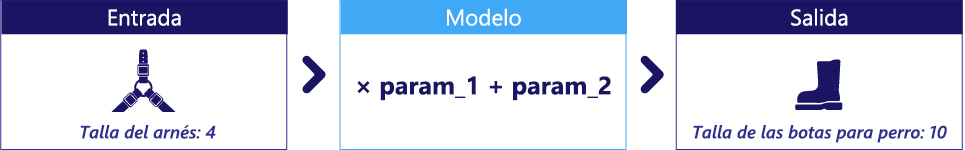

Al seleccionar un modelo elegimos los valores iniciales de los parámetros y después estos valores se ajustan durante el proceso de aprendizaje automatizado denominado entrenamiento.

### Preparando datos de prueba

In [2]:
import pandas
#!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
#!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/doggy-boot-harness.csv
#!pip install statsmodels


# Make a dictionary of data for boot sizes
# and harness size in cm
data = {
    'boot_size' : [ 39, 38, 37, 39, 38, 35, 37, 36, 35, 40, 
                    40, 36, 38, 39, 42, 42, 36, 36, 35, 41, 
                    42, 38, 37, 35, 40, 36, 35, 39, 41, 37, 
                    35, 41, 39, 41, 42, 42, 36, 37, 37, 39,
                    42, 35, 36, 41, 41, 41, 39, 39, 35, 39
 ],
    'harness_size': [ 58, 58, 52, 58, 57, 52, 55, 53, 49, 54,
                59, 56, 53, 58, 57, 58, 56, 51, 50, 59,
                59, 59, 55, 50, 55, 52, 53, 54, 61, 56,
                55, 60, 57, 56, 61, 58, 53, 57, 57, 55,
                60, 51, 52, 56, 55, 57, 58, 57, 51, 59
                ]
}

# Convert it into a table using pandas
dataset = pandas.DataFrame(data)

# Print the data
# In normal python we would write
# print(dataset)
# but in Jupyter notebooks, if we simple write the name
# of the variable and it is printed nicely 
dataset

,boot_size,harness_size
0,39,58
1,38,58
2,37,52
3,39,58
4,38,57
5,35,52
6,37,55
7,36,53
8,35,49
9,40,54


Queremos usar el tamaño del arnés para estimar el tamaño de la bota. Esto significa que harness_size es nuestra entrada. Queremos un modelo que procese la entrada y haga sus propias estimaciones del tamaño de la bota (salida).

### Seleccionando un modelo
Apenas estamos comenzando, así que comenzaremos con un modelo muy simple llamado OLS. Esta es solo una línea recta (a veces llamada línea de tendencia).

Let's use an existing library to create our model, but we won't train it yet.

In [3]:
# Load a library to do the hard work for us
import statsmodels.formula.api as smf

# First, we define our formula using a special syntax
# This says that boot_size is explained by harness_size
formula = "boot_size ~ harness_size"

# Create the model, but don't train it yet
model = smf.ols(formula = formula, data = dataset)

# Note that we have created our model but it does not 
# have internal parameters set yet
if not hasattr(model, 'params'):
    print("Model selected but it does not have parameters set. We need to train it!")

Model selected but it does not have parameters set. We need to train it!


### Entrenando nuestro modelo
Los modelos OLS tienen dos parámetros (slope y offset), pero aún no se han establecido en nuestro modelo. Necesitamos entrenar (ajustar) nuestro modelo para encontrar estos valores para que el modelo pueda estimar de manera confiable el tamaño de las botas de los perros en función del tamaño de su arnés.

In [5]:
# Load some libraries to do the hard work for us
# import graphing 

# Train (fit) the model so that it creates a line that 
# fits our data. This method does the hard work for
# us. We will look at how this method works in a later unit.
fitted_model = model.fit()

# Print information about our model now it has been fit
print("The following model parameters have been found:\n" +
        f"Line slope: {fitted_model.params[1]}\n"+
        f"Line Intercept: {fitted_model.params[0]}")

The following model parameters have been found:
Line slope: 0.5859254167382717
Line Intercept: 5.719109812682551


### Usando el modelo
Podemos usar el modelo en nuestro programa para predecir cualquier tamaño de bota que queramos. Ejecute el siguiente código para ver cómo podemos usar nuestro modelo ahora que está entrenado:

In [6]:
# harness_size states the size of the harness we are interested in
harness_size = { 'harness_size' : [52.5] }

# Use the model to predict what size of boots the dog will fit
approximate_boot_size = fitted_model.predict(harness_size)

# Print the result
print("Estimated approximate_boot_size:")
print(approximate_boot_size[0])

Estimated approximate_boot_size:
36.48019419144182
